# Supervised Learning: Classification

### Acknowledgements: Usman Alim 



Further Reading:

* `scikit-learn`: [user guide](https://scikit-learn.org/stable/user_guide.html).


## Quick Overview of scikit-learn

- [`scikit-learn`](https://scikit-learn.org/stable/) is the main machine learning library in the Python data science ecosystem.
- Implements many supervised (classification, regression) and unsupervised (clustering, density estimation, dimensionality reduction) learning algorithms.
- Relies heavily on `numpy`. Inputs and outputs are numpy arrays.
- Input data are expected to be $n \times D$ numerical arrays where $n$ is the number of observations, and $D$ is the number of features.
- Some feature wrangling may be needed, provides methods for feature extraction. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
# Processing data for model

import string
import re

def preprocess_text(raw_tweet):
    # Remove punctuation
    new_string = []
    for word in raw_tweet:
        # Check if the word is a URL
        if "https://" in word or "http://" in word:
            new_string.append(word)
        else:
            word = re.sub(r"[^A-Za-z0-9.\-]", " ", word)
            new_string.append(word)

    # Join the list of words into a string
    string1 = "".join(new_string)
    
    # Replace multiple spaces with a single space
    string1 = re.sub(r"\s+", " ", string1)
    
#     # Remove leading and trailing spaces
#     string1 = string1.strip()
    
    # Convert to lowercase
    string1 = string1.lower()

    return string1

# p_data['preprocessed_text'] = p_data['Tweet'].apply(preprocess_text)
# p_data

In [48]:
def preprocess_numbers(num):

    # Convert the numbers to a string representation
    data_str = "{:.4f}".format(num)
    return data_str

In [5]:
def get_c_vec_test_train(train_feature, test_feature, c_vec):
    # Fit and transform the preprocessed text
    c_vec_train = c_vec.fit_transform(train_feature)
    c_vect_test = c_vec.transform(test_feature)
    return c_vec_train, c_vect_test

def get_tf_vec_test_train(train_feature, test_feature, tfid_vec):
    tf_vec_train = tfid_vec.fit_transform(train_feature)
    tf_vec_test = tfid_vec.transform(test_feature)
    return tf_vec_train, tf_vec_test   
                                    
def get_NB(train_feature, train_lable, test_feature, test_labels, v_type, vectorizor, model):

    vectype = v_type
    
    if (vectype == "Count_Vectorizer"):
        vec_train, vect_test = get_c_vec_test_train(train_feature, test_feature, vectorizor)
    else:
        vec_train, vect_test =  get_tf_vec_test_train(train_feature, test_feature, vectorizor)                              

     
        
     # Train a Naive Bayes classifier on the count vectorized text
    model.fit(vec_train, train_lable)

    # Use the trained classifier to make predictions on the vectorized new text data
    pred_y = model.predict(vect_test)
    
    # Compute the accuracy score of the predicted labels
    accuracy = accuracy_score(test_labels, pred_y)
    print("accuracy by NB using {} vectorizer: {:.4f}%".format(vectype, accuracy * 100))
    return pred_y
  
    
def get_SVC(train_feature, train_lable, test_feature, test_labels, v_type, vectorizor, model):
    
    vectype = v_type
    
    if (vectype == "Count_Vectorizer"):
        vec_train, vect_test = get_c_vec_test_train(train_feature, test_feature,vectorizor)    
    else:
        vec_train, vect_test =  get_tf_vec_test_train(train_feature, test_feature, vectorizor)

    

    # Train SVM model using Tf vector

    clf.fit(vec_train, train_lable)

    pred_y = clf.predict(vect_test)

    # Evaluate model
    accuracy = accuracy_score(test_labels, pred_y)
    print("accuracy by SVC using {} vectorizer: {:.4f}%".format( vectype, accuracy * 100))

    return pred_y
    


In [6]:
# def get_OneConfusionMatrix(model, test_labels, pred_y):
    
  
#     cm = confusion_matrix(test_labels, pred_y)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
#     disp.plot()
#     plt.show()
    

# def get_ConMatrix_text(train_data, test_data):

#     get_OneConfusionMatrix(nb, 
#                         get_NB(train_feature, train_lable, test_feature, test_labels,"tfid_Vectorizer", tfid_vec, nb) )

#     get_OneConfusionMatrix(clf,
#                         get_SVC(train_feature, train_lable, test_feature, test_labels,"tfid_Vectorizer", tfid_vec, clf) )
    
#     get_OneConfusionMatrix(nb, 
#                     get_NB(train_feature, train_lable, test_feature, test_labels,"Count_Vectorizer", c_vec, nb) )

#     get_OneConfusionMatrix(clf,
#                        get_SVC(train_feature, train_lable, test_feature, test_labels,"Count_Vectorizer", tfid_vec, clf) )

In [7]:
def get_AllConfusionMatrix(model, test_labels ,pred_y, ax, label):
  
    cm = confusion_matrix(test_labels, pred_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
    disp.plot(ax=ax)
    ax.set_title(label)


def print_AllCMatrix(train_feature, train_lable, test_feature, test_labels, feature):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    labels = ['TF-ID NB', 'Count NB', 'TF-ID SVM', 'Count SVM']
    classifiers = [nb, nb, clf,  clf]
    vectorizers = [tfid_vec, c_vec, tfid_vec, c_vec]
    vectorizer_labels = ['tfid_Vectorizer', 'Count_Vectorizer', 'tfid_Vectorizer', 'Count_Vectorizer']
    all_labels = set(test_data)
    for i in range(4):
        pred_y = get_NB(train_feature, train_lable, test_feature, test_labels, vectorizer_labels[i], vectorizers[i], classifiers[i]) if i < 2 else get_SVC(train_feature, train_lable, test_feature, test_labels, vectorizer_labels[i], vectorizers[i], classifiers[i])
        get_AllConfusionMatrix(classifiers[i], test_labels ,  pred_y, axs[i], labels[i])

    s = 'Confusion Matrices of ' + feature 
    fig.suptitle(s)
    handles, labels = axs[-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=1)
    plt.show()


In [22]:
import chardet

with open('train80loc.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
train_data = pd.read_csv('train80loc.csv', encoding='ISO-8859-1')


In [23]:
with open('test20loc.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
test_data = pd.read_csv('test20loc.csv', encoding='ISO-8859-1')

In [8]:
# train_data = pd.read_csv('train80.csv')
# test_data = pd.read_csv('test20.csv')

In [42]:
def handelNullValues(df, column):
    
    if df[column].isnull().values.any():
        print( "before " , df[column].isnull().sum())
        df[column] = df[column].fillna(-1)
        print( "After " , df[column].isnull().sum())
        
    else:
        return 0
       

In [43]:
handelNullValues(test_data,'following') 
handelNullValues(test_data,'followers') 
handelNullValues(test_data,'is_retweet') 
handelNullValues(test_data,'actions') 

before  28
After  0
before  3
After  0
before  695
After  0


In [45]:
handelNullValues(train_data,'following') 
handelNullValues(train_data,'followers') 
handelNullValues(train_data,'is_retweet') 
handelNullValues(train_data,'actions')

before  130
After  0
before  14
After  0
before  1
After  0
before  2741
After  0


In [62]:
train_data

,Tweet,following,followers,actions,is_retweet,location,Type,preprocessed_text
0,San Jose celebrates national Gun Violence Awar...,68.0,91.0,1088.0,1.0,United States,Spam,san jose celebrates national gun violence awar...
1,And it's all thanks to the wonderful work from...,0.0,0.0,-1.0,0.0,Bulawayo,Quality,and it s all thanks to the wonderful work from...
2,Thought about doing stuff today but I think a ...,0.0,0.0,0.0,0.0,Maine,Quality,thought about doing stuff today but i think a ...
3,Change your thoughts and you change your world...,0.0,0.0,0.0,0.0,Indonesia,Quality,change your thoughts and you change your world...
4,i get so dramatic when i sing along to this so...,205.0,213.0,995.0,1.0,United States,Spam,i get so dramatic when i sing along to this so...
...,...,...,...,...,...,...,...,...
11912,Raptor Pharma says may stop developing liver d...,924.0,5840.0,1637.0,0.0,United States,Spam,raptor pharma says may stop developing liver d...
11913,FBI will expand system for gathering data on p...,9507.0,13051.0,11796.0,0.0,United States,Spam,fbi will expand system for gathering data on p...
11914,VIRAL VIDEO : Incoherent Malia Obama is Dragge...,0.0,0.0,18.0,0.0,United States,Spam,viral video incoherent malia obama is dragged ...
11915,Keep durant name out yo mouth #THUNDERUPhttps:...,0.0,0.0,0.0,0.0,Denver,Quality,keep durant name out yo mouth thunderuphttps t...


In [52]:
train_labels = train_data['Type']
test_labels = test_data['Type']

In [9]:
# Defining Naive Bayes classifier 
nb = MultinomialNB()

# Defining SVC model 
clf = SVC(kernel='linear', C=1, gamma='auto')

# Initialize the vectorizer with desired parameters
c_vec = CountVectorizer(max_features=1000)

# Vectorize tweets using TfidfVectorizer
tfid_vec = TfidfVectorizer()


# Visualizing the results

- We can visualize the results using a confusion matrix
- The confusion matrix tells us exactly how many of each type of flowers the model predicted and what the correct answers are

In [17]:
tweet_train = train_data['preprocessed_text']
tweet_test = test_data['preprocessed_text']

In [15]:
# apply the function to a pandas dataframe column
train_loc = train_data['location'].apply(preprocess_text)
test_loc = test_data['location'].apply(preprocess_text)

In [54]:
train_following = train_data['following'].apply(preprocess_numbers)
test_following = test_data['following'].apply(preprocess_numbers)

In [49]:
train_follower = train_data['followers'].apply(preprocess_numbers)
test_follower = test_data['followers'].apply(preprocess_numbers)

In [57]:
train_is_retweet = train_data['is_retweet'].apply(preprocess_numbers)
test_is_retweet = test_data['is_retweet'].apply(preprocess_numbers)

train_actions = train_data['actions'].apply(preprocess_numbers)
test_actions = test_data['actions'].apply(preprocess_numbers)

accuracy by NB using tfid_Vectorizer vectorizer: 72.9866%
accuracy by NB using Count_Vectorizer vectorizer: 75.5369%
accuracy by SVC using tfid_Vectorizer vectorizer: 72.9530%
accuracy by SVC using Count_Vectorizer vectorizer: 75.2685%


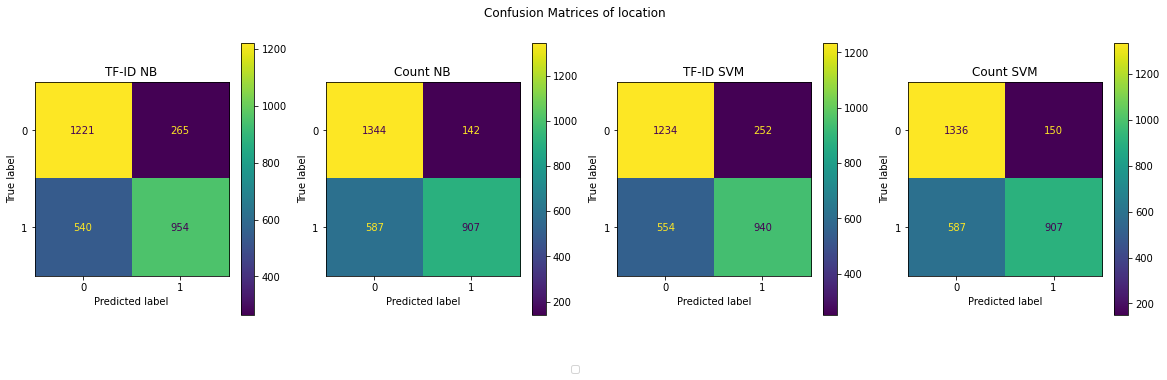

In [53]:
print_AllCMatrix(train_loc, train_label, test_loc, test_label,"location")

In [ ]:
print_AllCMatrix(train_follower, train_labels, test_follower, test_labels,"Followers")

accuracy by NB using tfid_Vectorizer vectorizer: 77.3826%
accuracy by NB using Count_Vectorizer vectorizer: 64.8658%
accuracy by SVC using tfid_Vectorizer vectorizer: 77.3826%
accuracy by SVC using Count_Vectorizer vectorizer: 64.8658%


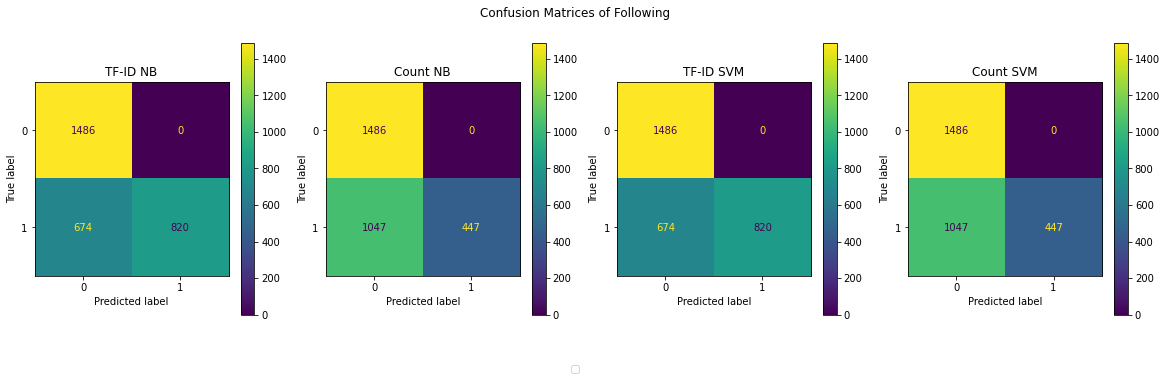

In [61]:
print_AllCMatrix(train_following, train_labels, test_following, test_labels,"Following")

accuracy by NB using tfid_Vectorizer vectorizer: 49.8658%
accuracy by NB using Count_Vectorizer vectorizer: 49.8658%
accuracy by SVC using tfid_Vectorizer vectorizer: 49.8658%
accuracy by SVC using Count_Vectorizer vectorizer: 49.8658%


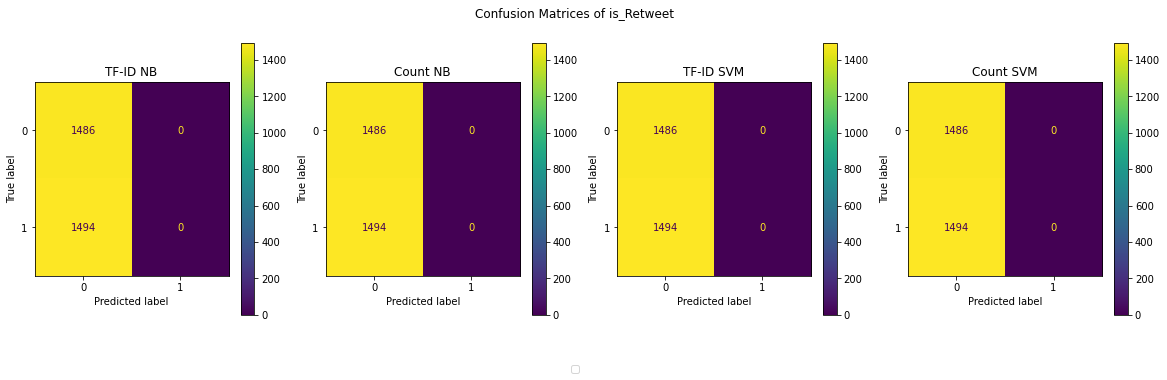

In [63]:
print_AllCMatrix(train_is_retweet, train_labels, test_is_retweet, test_labels,"is_Retweet")

accuracy by NB using tfid_Vectorizer vectorizer: 61.9799%
accuracy by NB using Count_Vectorizer vectorizer: 53.1208%
accuracy by SVC using tfid_Vectorizer vectorizer: 62.2148%
accuracy by SVC using Count_Vectorizer vectorizer: 53.1208%


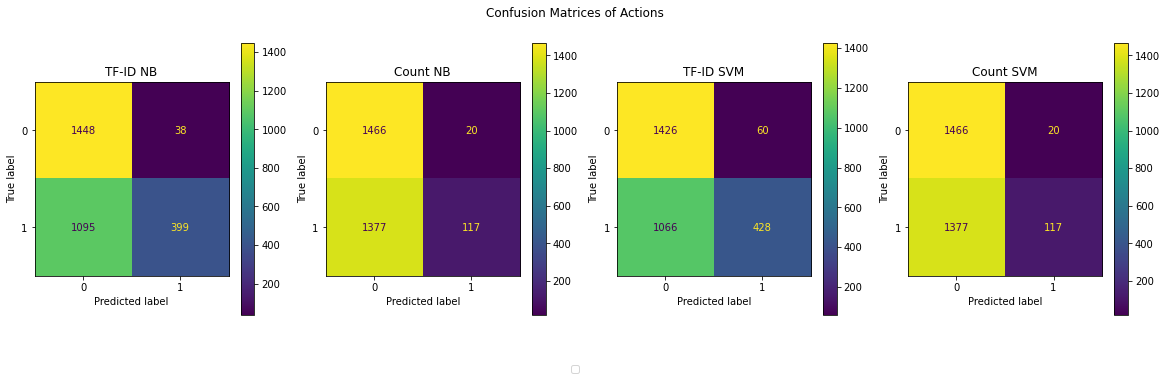

In [60]:
print_AllCMatrix(train_actions, train_labels, test_actions, test_labels,"Actions")

# Two Features Analysis:

In [18]:
# Concatenate two features
ctl_train = tweet_train + ' ' + train_loc
ctl_loc_test = tweet_test + ' ' + test_loc

accuracy by NB using tfid_Vectorizer vectorizer: 91.6443%
accuracy by NB using Count_Vectorizer vectorizer: 92.9866%
accuracy by SVC using tfid_Vectorizer vectorizer: 94.8993%
accuracy by SVC using Count_Vectorizer vectorizer: 94.7315%


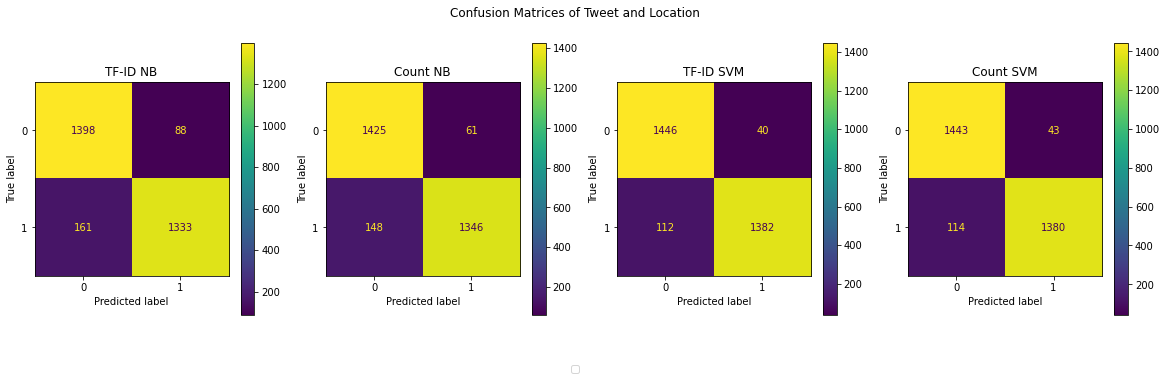

In [53]:
print_AllCMatrix(ctl_train, train_labels, ctl_loc_test, test_labels,"Tweet and Location")

accuracy by NB using tfid_Vectorizer vectorizer: 84.1275%
accuracy by NB using Count_Vectorizer vectorizer: 70.9396%
accuracy by SVC using tfid_Vectorizer vectorizer: 89.2617%
accuracy by SVC using Count_Vectorizer vectorizer: 70.4362%


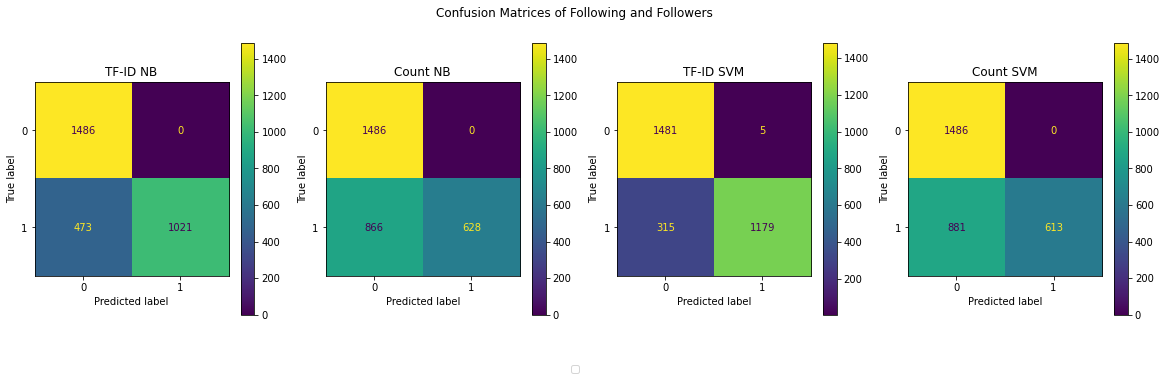

In [55]:
FF_train = train_following + ' ' + train_follower
FF_test = test_following + ' ' + test_follower

print_AllCMatrix(FF_train, train_labels, FF_test, test_labels,"Following and Followers")

accuracy by NB using tfid_Vectorizer vectorizer: 61.8121%
accuracy by NB using Count_Vectorizer vectorizer: 53.1208%
accuracy by SVC using tfid_Vectorizer vectorizer: 62.2148%
accuracy by SVC using Count_Vectorizer vectorizer: 53.1208%


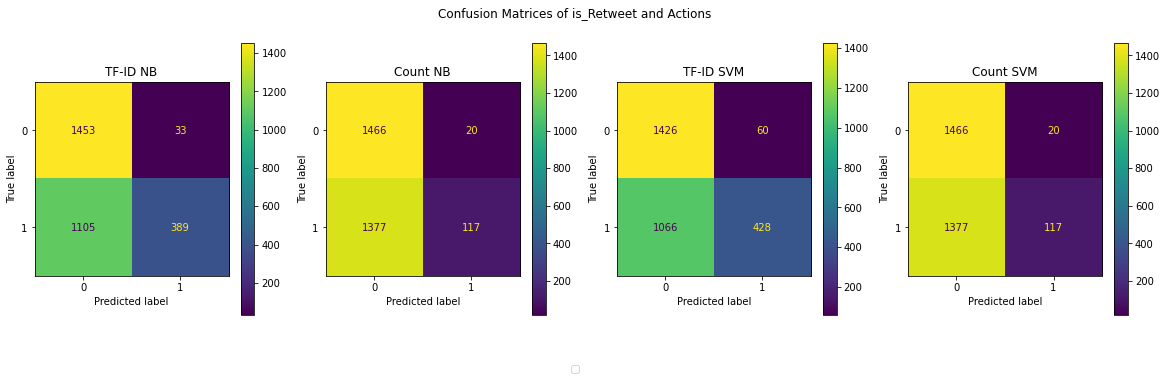

In [58]:
iRA_train = train_is_retweet + ' ' + train_actions
iRA_test = test_is_retweet + ' ' + test_actions

print_AllCMatrix(iRA_train, train_labels, iRA_test, test_labels,"is_Retweet and Actions")